# PHYS397 A1:

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# RELATIVE PATH OF THE CHOSEN DATA SET

DS_1_path = "DATASET_1.txt.TXT"
DS_2_path = "DATASET_2.txt.TXT"
DS_3_path = "DATASET_3_S.txt.TXT"



def import_dataset(file_name):
  '''
  This function will import the data from the specified file and return a pandas dataframe.

  Parameters: 
  file_name (str): The name of the file to be imported.

  Returns:
  pandas dataframe: The imported data.
  '''
  return pd.read_csv(
        file_name,
        skiprows=6,
        names=['Entry','ArdTime','ADC', 'SiPM', 'Deadtime', 'Temp'],
        lineterminator='\n',
        sep='\s+',
        encoding='unicode_escape',
        engine='python'
    )

# import the datasets

dataset_1 = import_dataset(DS_1_path)
dataset_2 = import_dataset(DS_2_path)
dataset_3 = import_dataset(DS_3_path)


# converting the ArdTime column from milliseconds to seconds for all datasets

dataset_1.ArdTime = dataset_1.ArdTime/1000 # converting the ArdTime column from milliseconds to seconds for dataset_1
dataset_2.ArdTime = dataset_2.ArdTime/1000 # converting the ArdTime column from milliseconds to seconds for dataset_2
dataset_3.ArdTime = dataset_3.ArdTime/1000 # converting the ArdTime column from milliseconds to seconds for dataset_3

dataset_1.Deadtime = dataset_1.Deadtime/1000 # converting the Deadtime column from milliseconds to seconds for dataset_1
dataset_2.Deadtime = dataset_2.Deadtime/1000 # converting the Deadtime column from milliseconds to seconds for dataset_2
dataset_3.Deadtime = dataset_3.Deadtime/1000 # converting the Deadtime column from milliseconds to seconds for dataset_3


#Create a figure with histograms of the number of events per 10 s window versus time of datasets 1 and 2. 


print(dataset_3)

   Entry  ArdTime  ADC   SiPM  Deadtime   Temp
0      1    0.628   89  21.05     0.000  22.51
1      2    1.027  384  80.08     0.015  22.29
2      3    1.183  414  93.93     0.034  22.51
3      4    1.393   92  21.32     0.053  22.51
4      5    3.452   62  17.75     0.072  22.40
5      6    3.491   71  19.06     0.091  22.51


### Step 22: 

Create a histogram of number of events per 10s window for datasets 1 and 2 on the same plot.



Text(0, 0.5, 'events')

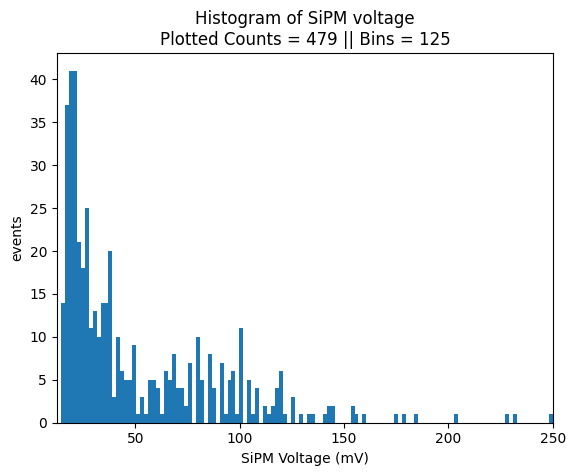

In [4]:
''' ADJUSTABLE VARIABLES '''

x_min = 12.5 # Minimum range of the histogram

x_max = 250 # Maximum range of the histogram

bin = 125 # Number of histogram bins

density = False # True: Normalized plot || False: Non-normalized plot

x_range = [x_min, x_max] # Histogram plot range

x_label = 'SiPM Voltage (mV)' # label for the x axis

y_label = 'events' # label for the y axis


''' CALCULATIONS '''

SiPM_array = np.array(dataset_1.SiPM) # Numpy array of all SiPM values

event_number = len(SiPM_array[(SiPM_array >= x_min) & (SiPM_array <= x_max)]) # Get the number of events within the plot range


''' PLOTTING CODE '''

plt.figure() # Begin figure setup

plt.hist(dataset_1.SiPM, bins = bin, range = x_range, density = density) # Calling the histogram matplotlib function and providing the spreadsheet column in use and the number of bins we will use

plt.title('Histogram of SiPM voltage\nPlotted Counts = %d || Bins = %i' % (event_number, bin)) # Setting the title of the plot

plt.xlim(x_range) # the graph's domain

plt.xlabel(x_label) # x axis label

plt.ylabel(y_label) # y axis label

In [ ]:
# Lab Introduction:

# In this lab, we used custom-built scintillation detectors to explore the rate at which cosmic rays strike the Earth's surface.
# The detectors are based on the Cosmic Watch Muon Detector project, a collaboration between MIT and the Polish National Center for Nuclear Research (NCBJ). Further details about the project can be found here: http://www.cosmicwatch.lns.mit.edu/
# We took a series of measurements, in which we recorded the voltage output of the SiPM (Silicon Photomultiplier) detector as a function of time. The SiPM detector is a semiconductor device that converts photons into an electrical signal. The SiPM detector is connected to an Arduino microcontroller, which records the voltage output of the detector as a function of time. 
# Measurements were taken both in individual mode (in two different locations to compare the count rate), and in coincidence mode, to determine whether 

Text(0, 0.5, 'events')

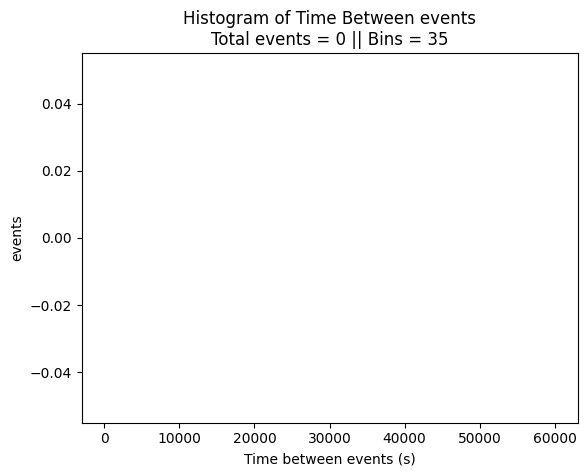

In [12]:
''' ADJUSTABLE VARIABLES '''

#Note that this will take a long time with large datasets, this code could be improved. 

x_min = 0 # Minimum range of the histogram 

x_max = 6 # Maximum range of the histogram 

bins = 35 # Number of histogram bins 

density = False # True: Normalized plot || False: Non-normalized plot

x_range = [x_min, x_max] # Histogram plot range

x_label = "Time between events (s)" # label for the x axis

y_label = 'events' # label for the y axis


''' CALCULATIONS '''

timeDelta_array = np.array([]) # creating an array to store the calculated time deltas

time_initial = 0 # setting the initial time

for i in d.ArdTime.array: # for each loop to go through the elements of filePD.ArdTime.array
    
    timeDelta = i - time_initial # finding the time delta between the initial time and the element of the ArdTime array

    timeDelta_array = np.append(timeDelta_array, timeDelta) # Appending the time delta to the timeDelta_array array

    time_initial = i # setting the new initial time to the previous 

event_number = len(timeDelta_array[(timeDelta_array >= x_min) & (timeDelta_array <= x_max)]) # Get the number of events within the plot range


''' PLOTTING CODE '''

plt.hist(timeDelta_array, bins= bins, range = x_range, density = density) # Histogram plot

plt.title("Histogram of Time Between events\nTotal events = %i || Bins = %i" % (event_number, bins)) # Setting the plot title

plt.xlabel(x_label) # x axis label

plt.ylabel(y_label) # y axis label



In [15]:
#note that this assumes a constant rate throughout the data-taking process. The calculation is simply the total number of counts divided by
#the amount of time the detector was actively reading (total time - deadtime).

''' UNCERTIANTY CALCULATION '''

N = np.array(dataset_3.Entry)[-1] # The number of counts made over the course of the run

total_deadtime = np.array(dataset_3.Deadtime)[-1] # The total time that the arduino was incapable of making measurements

total_time = np.array(dataset_3.ArdTime)[-1] # The total time of the run

uncertainty = np.sqrt(N)/(total_time-total_deadtime) # uncertainty rate calculation

rate = N/(total_time-total_deadtime)


''' OUTPUT '''

print('The average rate of detections was found to be %f +- %f counts/second' % (rate, uncertainty)) # output statement


IndexError: index -1 is out of bounds for axis 0 with size 0